<a href="https://colab.research.google.com/github/Do1kk/COVID-19_Project/blob/master/Copy_of_ProjectPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Porównanie dwóch wybranych modeli ML do przewidywania zgonów z powodu wybuchu COVID-19**

## **Pobranie danych z 2 źródeł.**

In [696]:
import urllib.request
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline
plt.style.use('seaborn-whitegrid')

### Pierwsze źródło

In [697]:
url1 = "https://raw.githubusercontent.com/dtandev/coronavirus/master/data/CoronavirusPL%20-%20General.csv"
data1 = pd.read_csv(url1)
data1.tail(3)

,Timestamp,Confirmed,Deaths,Recovered,In_the_hospital,In_quarantine,Under_medical_supervision,Number_of_tests_carried_out
104,15-06-2020,29788,1256,9668,1806,95641,17261,1202024
105,16-06-2020,30195,1272,9936,1693,96255,17195,1221133
106,17-06-2020,30701,1286,10284,1849,93722,17354,1247099


In [698]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Timestamp                    107 non-null    object
 1   Confirmed                    107 non-null    int64 
 2   Deaths                       107 non-null    int64 
 3   Recovered                    107 non-null    int64 
 4   In_the_hospital              107 non-null    int64 
 5   In_quarantine                107 non-null    int64 
 6   Under_medical_supervision    107 non-null    int64 
 7   Number_of_tests_carried_out  107 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.8+ KB


In [699]:
data1.describe()

,Confirmed,Deaths,Recovered,In_the_hospital,In_quarantine,Under_medical_supervision,Number_of_tests_carried_out
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02
mean,12006.504673,533.775701,2984.616822,1995.757009,85302.813084,24949.467290,4.027432e+05
std,9836.652463,456.829998,3355.924164,825.179373,44316.603847,13505.353918,3.949041e+05
min,0.000000,0.000000,0.000000,65.000000,316.000000,4459.000000,5.590000e+02
25%,1958.500000,26.500000,21.500000,1698.000000,77614.500000,18012.500000,4.469500e+04
50%,11273.000000,524.000000,1391.000000,2248.000000,87003.000000,19161.000000,2.789940e+05
75%,20381.000000,977.000000,5774.000000,2557.500000,101089.500000,29850.000000,7.084005e+05
max,30701.000000,1286.000000,10284.000000,3505.000000,183095.000000,59081.000000,1.247099e+06


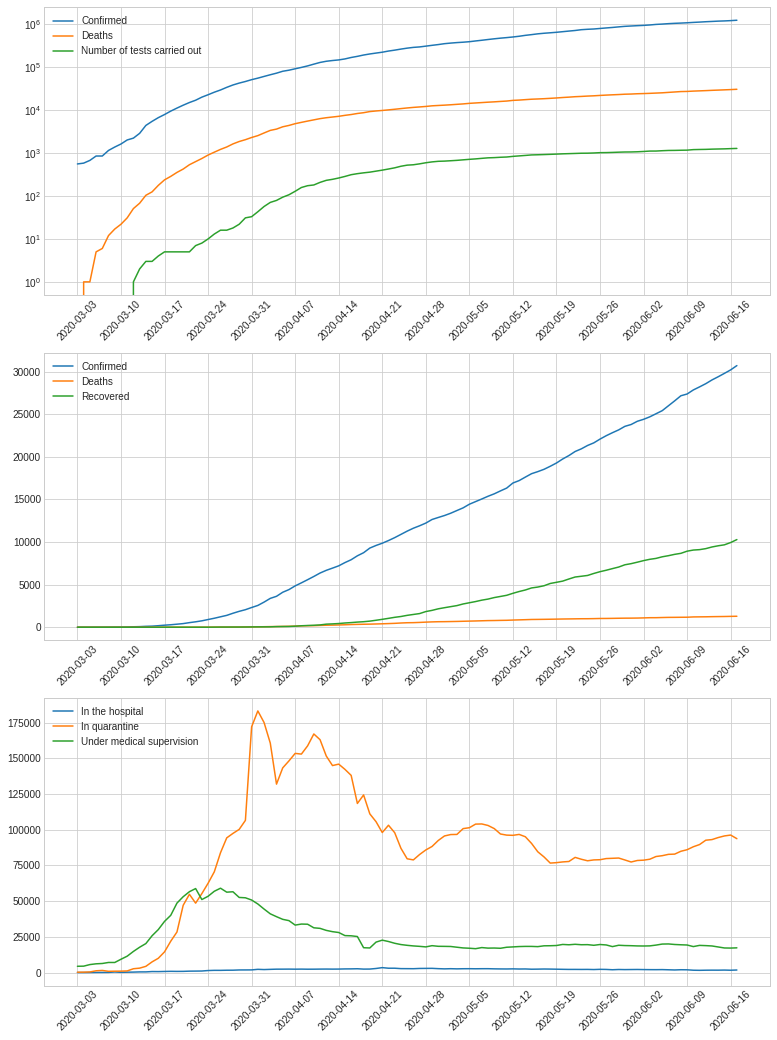

In [700]:
data1["Timestamp"] = pd.to_datetime(data1["Timestamp"], dayfirst=True)
first_day_list = list((d for d in data1["Timestamp"] if d.dayofweek == 1))

plt.figure(figsize=[13, 18])
plt.subplot(311)
plt.plot(data1["Timestamp"], data1[["Number_of_tests_carried_out", "Confirmed", "Deaths"]])
plt.xticks(first_day_list, rotation=45)
plt.yscale("log")
plt.legend(("Confirmed", "Deaths", "Number of tests carried out"), loc='upper left')

plt.subplot(312)
plt.plot(data1["Timestamp"], data1[["Confirmed", "Deaths", "Recovered"]])
plt.xticks(first_day_list, rotation=45)
plt.legend(("Confirmed", "Deaths", "Recovered"), loc='upper left')

plt.subplot(313)
plt.plot(data1["Timestamp"], data1[["In_the_hospital", "In_quarantine", "Under_medical_supervision"]])
plt.xticks(first_day_list, rotation=45)
plt.legend(("In the hospital", "In quarantine", "Under medical supervision"), loc='upper left')

plt.show()

### Drugie źródło

In [701]:
url2_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url2_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url2_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
data2_confirmed = pd.read_csv(url2_confirmed)
data2_deaths = pd.read_csv(url2_deaths)
data2_recovered = pd.read_csv(url2_recovered)
data2_confirmed = data2_confirmed[data2_confirmed["Country/Region"] == "Poland"].T
data2_deaths = data2_deaths[data2_deaths["Country/Region"] == "Poland"].T
data2_recovered = data2_recovered[data2_recovered["Country/Region"] == "Poland"].T
data2 = data2_confirmed.rename(columns={data2_confirmed.columns[0]: "Confirmed"})
data2["Deaths"], data2["Recovered"] = data2_deaths, data2_recovered
data2.drop(['Lat', 'Long'], inplace=True)

data2["Confirmed"] = pd.to_numeric(data2["Confirmed"], errors='coerce')
data2["Deaths"] = pd.to_numeric(data2["Deaths"], errors='coerce')
data2["Recovered"] = pd.to_numeric(data2["Recovered"], errors='coerce')
data2.dropna(inplace=True)
data2 = data2.astype(int)
data2["Timestamp"] = data2.index
data2.reset_index(inplace=True, drop=True)
data2.drop(list(range(41)), inplace=True) # Cut to date 3/3/20.

data2.tail(3)

,Confirmed,Deaths,Recovered,Timestamp
155,33119,1412,18654,6/25/20
156,33395,1429,19218,6/26/20
157,33714,1435,19972,6/27/20


In [702]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 41 to 157
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Confirmed  117 non-null    int64 
 1   Deaths     117 non-null    int64 
 2   Recovered  117 non-null    int64 
 3   Timestamp  117 non-null    object
dtypes: int64(3), object(1)
memory usage: 4.6+ KB


In [703]:
data2.describe()

,Confirmed,Deaths,Recovered
count,117.000000,117.000000,117.000000
mean,13748.102564,605.863248,5596.487179
std,11010.296027,496.810602,6046.482603
min,0.000000,0.000000,0.000000
25%,2554.000000,43.000000,47.000000
50%,12877.000000,644.000000,3236.000000
75%,23155.000000,1051.000000,10692.000000
max,33714.000000,1435.000000,19972.000000


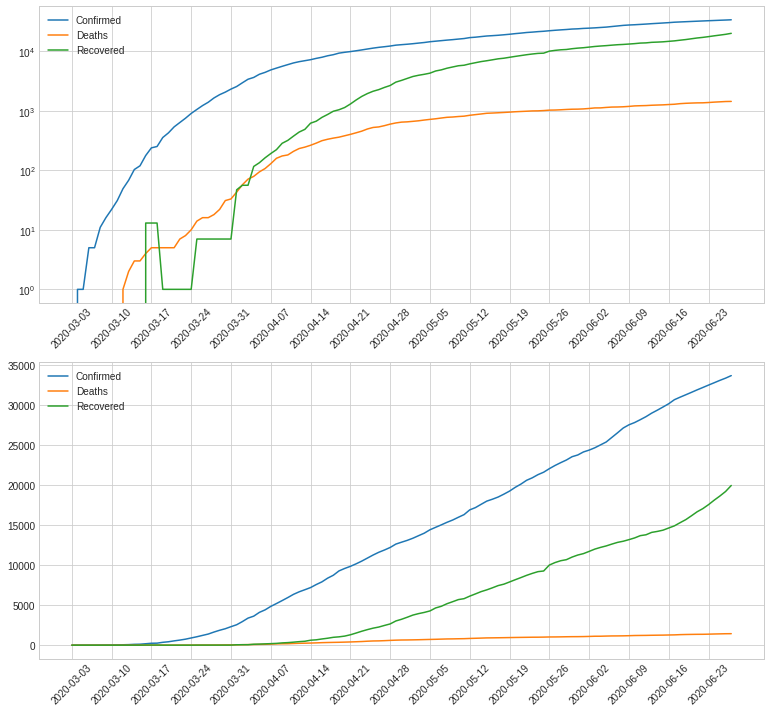

In [704]:
data2["Timestamp"] = pd.to_datetime(data2["Timestamp"], dayfirst=False)
first_day_list = list((d for d in data2["Timestamp"] if d.dayofweek == 1))

plt.figure(figsize=[13, 12])
plt.subplot(211)
plt.plot(data2["Timestamp"], data2[["Confirmed", "Deaths", "Recovered"]])
plt.xticks(first_day_list, rotation=45)
plt.yscale("log")
plt.legend(("Confirmed", "Deaths", "Recovered"), loc='upper left')

plt.subplot(212)
plt.plot(data2["Timestamp"], data2[["Confirmed", "Deaths", "Recovered"]])
plt.xticks(first_day_list, rotation=45)
plt.legend(("Confirmed", "Deaths", "Recovered"), loc='upper left')

plt.show()

## **Utworzenie dwóch modeli ML dla źródła pierwszego.**

In [705]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### **Pierwszy model ML.**

In [706]:
data1_for_model = copy.copy(data1)
data1_for_model["Timestamp"] = data1_for_model["Timestamp"].dt.dayofyear
X = data1_for_model.iloc[:, [0, 1, 3, 4, 5, 6, 7]]
y = data1_for_model["Deaths"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.2, shuffle=False)

In [707]:
hidden_layers = (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
model_regr = MLPRegressor(random_state=43, 
                          max_iter=1000, 
                          hidden_layer_sizes=hidden_layers, 
                          early_stopping=True)
model_regr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=1000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=43,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [708]:
y_pred = model_regr.predict(X_test)
s1_m1_score = model_regr.score(X_test, y_test)
s1_m1_score

-0.9940123115356969

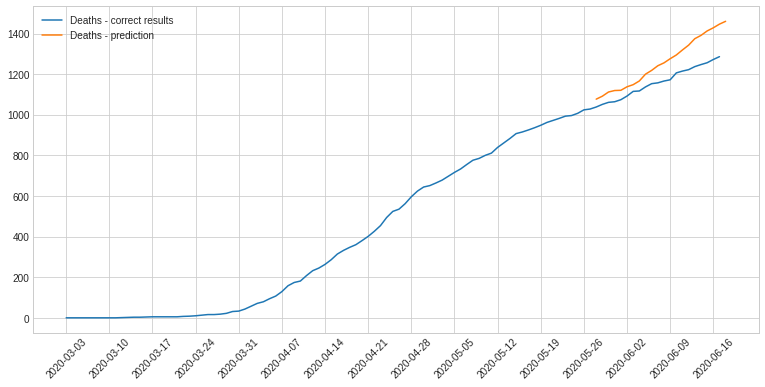

In [709]:
date_tmp = pd.to_datetime(X_test["Timestamp"], format="%j", exact=False)
date_tmp = [str(date.day) + '/' +  str(date.month) + '/' + str(date.year + 120) for date in date_tmp]
date_tmp = pd.to_datetime(date_tmp, format="%d/%m/%Y", exact=False)

plt.figure(figsize=[13, 6])
plt.plot(data1["Timestamp"], data1["Deaths"])
plt.plot(date_tmp, y_pred)
plt.xticks(list((d for d in data1["Timestamp"] if d.dayofweek == 1)), rotation=45)
plt.legend(("Deaths - correct results", "Deaths - prediction"), loc='upper left')

plt.show()

### **Drugi model ML.**

In [710]:
model_reg = make_pipeline(StandardScaler(),
                          SGDRegressor(loss='squared_loss', 
                                       early_stopping=True, 
                                       random_state=43))
model_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=True,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=43, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [711]:
y_pred = model_reg.predict(X_test)
s1_m2_score = model_reg.score(X_test, y_test)
s1_m2_score

-0.2043844757981721

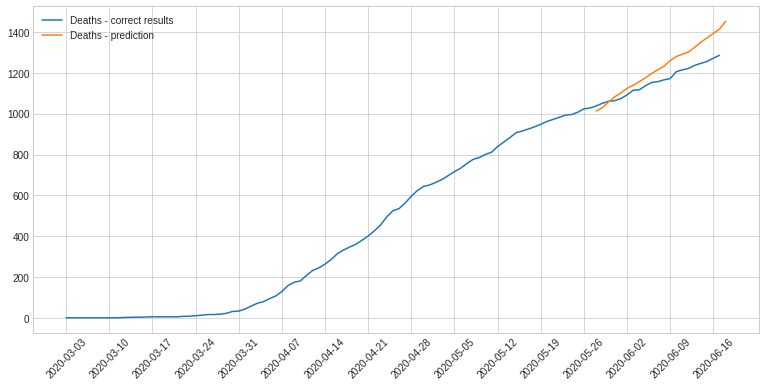

In [712]:
plt.figure(figsize=[13, 6])
plt.plot(data1["Timestamp"], data1["Deaths"])
plt.plot(date_tmp, y_pred)
plt.xticks(list((d for d in data1["Timestamp"] if d.dayofweek == 1)), rotation=45)
plt.legend(("Deaths - correct results", "Deaths - prediction"), loc='upper left')

plt.show()

## **Utworzenie dwóch modeli ML dla źródła drugiego.**

### **Pierwszy model ML.**

In [713]:
data2_for_model = copy.copy(data2)
data2_for_model["Timestamp"] = data2_for_model["Timestamp"].dt.dayofyear
X = data2_for_model.iloc[:, [0, 2, 3]]
y = data2_for_model["Deaths"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.2, shuffle=False)

In [714]:
hidden_layers = (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
model_regr = MLPRegressor(random_state=43, 
                          max_iter=1000, 
                          hidden_layer_sizes=hidden_layers, 
                          early_stopping=True)
model_regr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=1000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=43,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [715]:
y_pred = model_regr.predict(X_test)
s2_m1_score = model_regr.score(X_test, y_test)
s2_m1_score

-3.8112253360179493

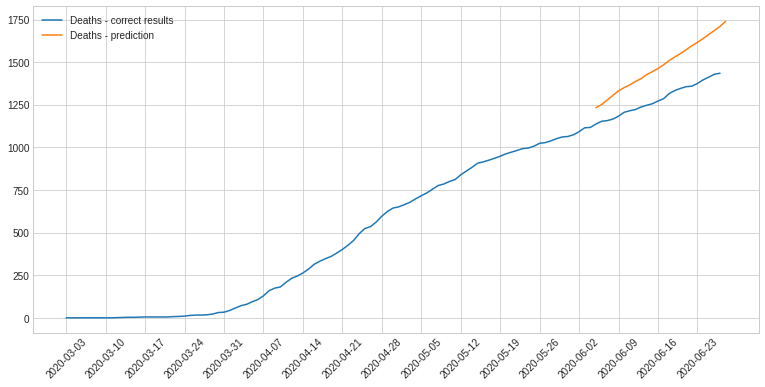

In [716]:
date_tmp = pd.to_datetime(X_test["Timestamp"], format="%j", exact=False)
date_tmp = [str(date.day) + '/' +  str(date.month) + '/' + str(date.year + 120) for date in date_tmp]
date_tmp = pd.to_datetime(date_tmp, format="%d/%m/%Y", exact=False)

plt.figure(figsize=[13, 6])
plt.plot(data2["Timestamp"], data2["Deaths"])
plt.plot(date_tmp, y_pred)
plt.xticks(list((d for d in data2["Timestamp"] if d.dayofweek == 1)), rotation=45)
plt.legend(("Deaths - correct results", "Deaths - prediction"), loc='upper left')

plt.show()

### **Drugi model ML.**

In [717]:
model_reg = make_pipeline(StandardScaler(),
                          SGDRegressor(loss='squared_loss', 
                                       early_stopping=True, 
                                       random_state=43))
model_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=True,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=43, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [718]:
y_pred = model_reg.predict(X_test)
s2_m2_score = model_reg.score(X_test, y_test)
s2_m2_score

0.08053369716305214

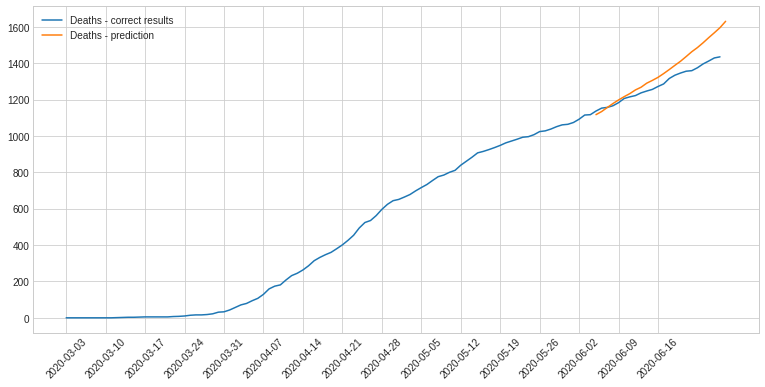

In [719]:
plt.figure(figsize=[13, 6])
plt.plot(data2["Timestamp"], data2["Deaths"])
plt.plot(date_tmp, y_pred)
plt.xticks(list((d for d in data1["Timestamp"] if d.dayofweek == 1)), rotation=45)
plt.legend(("Deaths - correct results", "Deaths - prediction"), loc='upper left')

plt.show()

## **Porównanie wyników.**

In [721]:
columns_names = ["Source", "'MLPRegressor' model coef. R^2", "'SGDRegressor' model coef. R^2"]
table_data = [("First ('dtandev')", "Second ('CSSEGISandData')"), 
              (round(s1_m1_score, 2), round(s2_m1_score, 2)), 
              (round(s1_m2_score, 2), round(s2_m2_score, 2))]
              
fig = go.Figure(data=[go.Table(header=dict(values=columns_names,
                                           fill_color='paleturquoise',
                                           line_color='black',
                                           font_size=18,
                                           height=35,
                                           align=['left', 'center'],),
                               cells=dict(values=table_data,
                                          fill=dict(color=['lavender', 'white']),
                                          line_color='black',
                                          font_size=14,
                                          height=40,
                                          align=['left', 'center'],))])
fig.update_layout(autosize=False,
                  width=1200,
                  height=150,
                  margin=dict(l=10, r=10, t=10, b=10))
fig.show()